In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyperparameters
stepsize = 1e-4

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def loss(y, out):
    L = 0
    for i in range(y.size):
        L += (1/2) * (y[i]-out[i])**2
    return L

In [5]:
# Network:
# input x: R^(3*1)
# hidden layer h: R^(4*1)
# output layer out: R^(2*1)

# Graph:
# x -> W1*x = z -> sigmoid(z) = h -> W2*h = out

# weights
def init_weights():
    # init (W1, W2) ~ Normal Gaussian
    W1 = np.random.rand(4,3)
    W2 = np.random.rand(2,4)
    return W1, W2

def forward(x, W1, W2):
    z = np.dot(W1, x) # h*1
    h = sigmoid(z) #h*1

    out = np.dot(W2, h) #o*1
    return out

In [6]:
# init model
W1, W2 = init_weights()
x = np.random.rand(3,1)

out = forward(x, W1, W2)
y = np.array([10,-2])[:,None]

print(x)
print(y)
print(out)
L = loss(y, out)
L

[[0.64939334]
 [0.7704799 ]
 [0.66021291]]
[[10]
 [-2]]
[[1.56664067]
 [1.00139225]]


array([40.06495249])

In [7]:
# calculate dL_dW2
def W2_grad(x, y, out, W1):
    h = sigmoid(np.dot(W1, x))
    dL_dW2 = np.dot((-y + out), h.T)
    return dL_dW2

W2_grad(x, y, out, W1)

array([[-5.82016268, -4.9195419 , -5.69856975, -5.99530692],
       [ 2.07136806,  1.75084143,  2.02809372,  2.13370106]])

In [8]:
# calculate dL_dW1
def W1_grad(x, y, out, W1, W2):
    z = np.dot(W1, x)
    
    a = (-y + out).T
    b = np.dot(a, W2)
    
    c = sigmoid(z) * (1 - sigmoid(z))
    
    d = b.T * c
    
    dL_dW1 = d * x.T
    return dL_dW1

W1_grad(x, y, out, W1, W2)

array([[ 0.0231634 ,  0.02748247,  0.02354933],
       [-0.92055436, -1.09220188, -0.93589175],
       [-0.8262928 , -0.98036421, -0.84005969],
       [-0.5623849 , -0.66724777, -0.57175481]])

In [9]:
def update_weights(x, y, out, W1, W2, stepsize):
    new_W1 = W1 - stepsize * W1_grad(x, y, out, W1, W2)
    new_W2 = W2 - stepsize * W2_grad(x, y, out, W1)
    return new_W1, new_W2

W1, W2 = update_weights(x, y, out, W1, W2, stepsize)
W1, W2

(array([[0.39648036, 0.37602858, 0.38404979],
        [0.18591119, 0.04167148, 0.2785186 ],
        [0.19024909, 0.06115962, 0.8537801 ],
        [0.0545512 , 0.43444166, 0.80239174]]),
 array([[0.15106017, 0.73649631, 0.82716617, 0.66862462],
        [0.47818199, 0.12466736, 0.38767533, 0.47286998]]))

##### Fitting to a fixed label $y=[10, -2]$:

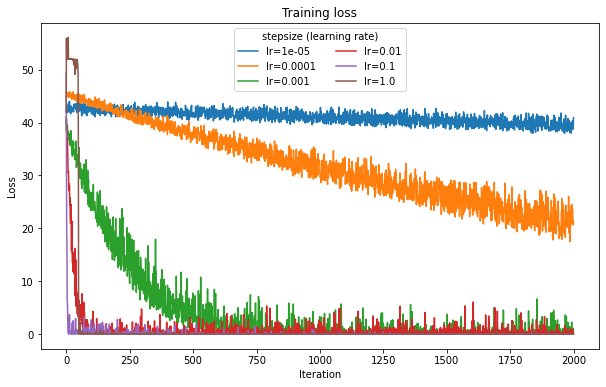

In [10]:
# Training loop

plt.figure(figsize=(10, 6))
plt.title('Training loss')

learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e+0]
for stepsize in learning_rates:
    W1, W2 = init_weights()
    Losses = []
    
    for i in range(2_000):
        x = np.random.rand(3,1)
        y = np.array([10,-2])[:,None]
        out = forward(x, W1, W2)
        Losses.append(loss(y, out).item())
        W1, W2 = update_weights(x, y, out, W1, W2, stepsize)
        
    plt.plot(range(0, len(Losses)), Losses, label=f'lr={stepsize}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc='upper center', title='stepsize (learning rate)',ncol=2)
plt.show()

In [11]:
# inference
x = np.random.rand(3,1)
print("input x:\n", x, "\n")
y = np.array([10,-2])[:,None]
print("label y:\n", y, "\n")
pred = forward(x, W1, W2)
print("prediction:\n", pred, "\n")
print("Loss:", loss(y, pred))

input x:
 [[0.42963737]
 [0.79965055]
 [0.36776805]] 

label y:
 [[10]
 [-2]] 

prediction:
 [[ 9.88078792]
 [-1.97326016]] 

Loss: [0.00746327]
